# Lab 07-4 MNIST introduction
* MNIST(Modified National Institute of Standards and Technology database)는 0~9까지의 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

### 기본 Library 선언 및 TensorFlow 버전 확인

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.3.0


## Learning
* Onlinne vs Batch 차이 확인. 

online - data가 계속 들어오는 것, batch는 data가 정적임. 
이에 online의 경우 1) network 가 연결, 2) model의 update, 3) weight 매번 tunning, 4) tunning이 잘 되어야 하기 때문에 GPU와 같이 고급 프로세스를 써야 함. 5) realtime, 6) priority - speed가 중요함.

* Fine tuning 이란? 

Fine tunning과는 다른 걸로 Feature Extraction이라는 것이 있음. 
Fine tunning은 기존 모델에서 weight을 미세하게 조절해 기존 모델에서 못 하던 것을 하게 하는 것. 

`saver = model.save 
tf.keras.models.load_model(keras_model_path)`

Feature Extraction은 기존 모델에서 나온 값에다 추가적으로 작업을 하여 값을 도출.

* Efficient Models

실제로 쓰려면 성능도 중요하다. 
방법으로는 Depthwise Convolution, Pointwise Convolution 등이 있다.

**Anomaly detection** 라는 것이 있다. 

정상 데이터를 이용해 이상한 데이터를 없애는 방법도 있음.

### 강의에 설명할 Data입니다
* Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)
(60000,)


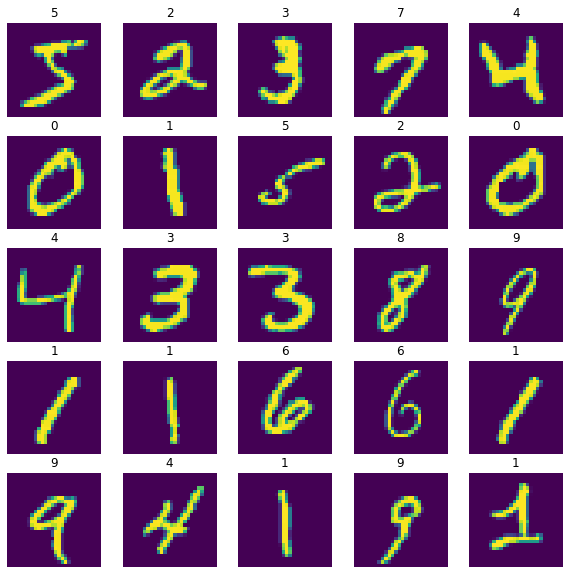

In [11]:
print(x_train.shape)
print(y_train.shape)
def see_data(data_25, label_25, col=5, row=5, size = 2):
    fig, axes = plt.subplots(nrows = row, ncols= col, figsize=(row*size, col *size))
    for i, (data, label) in enumerate(zip(data_25, label_25)):
        pos_col = i % row
        pos_row = i // row
        axes[pos_col, pos_row].imshow(data)
        axes[pos_col, pos_row].axis('off')
        axes[pos_col, pos_row].set_title(label)
                                    
see_data(x_train[:25], y_train[:25])

###  Tensorflow Keras
#### 위 Data를 기준으로 분류 모델을 만들도록 하겠습니다
* Tensorflow keras API를 통해 모델에 대한 정의

In [21]:
demo_test = x_train[0,...]
demo_test.shape

(28, 28)

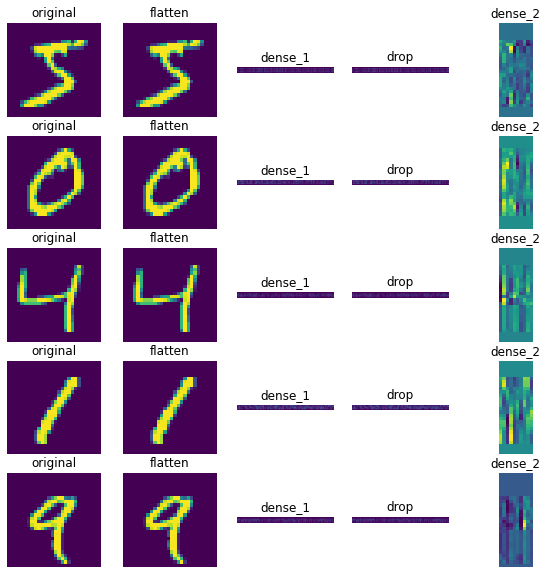

In [62]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
def demo_display(demo_test):
    demo_model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten()
    ])
    flatten_result = demo_model(demo_test)
    demo_model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))
    dense_1_result = demo_model(demo_test)
    demo_model.add(tf.keras.layers.Dropout(0.2))
    drop_result = demo_model(demo_test)
    demo_model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
    dense_2_result = demo_model(demo_test)
    
    list_data = [demo_test, flatten_result, dense_1_result, drop_result, dense_2_result]
    list_text = ['original', 'flatten', 'dense_1', 'drop', 'dense_2']
    return list_data, list_text

list_list_data = []
list_list_text = []
fig, axes = plt.subplots(5, 5, figsize = (10, 10))
for demo_test in x_train[:5]:
    list_data, list_test = demo_display(demo_test)
    list_list_data.append(list_data)
    list_list_text.append(list_text)
    
for j, (list_data, list_text) in enumerate(zip(list_list_data, list_list_text)):
    for i, (data, text)in enumerate(zip(list_data, list_text)):
        axes[j][i].imshow(data)
        axes[j][i].axis('off')
        axes[j][i].set_title(text)

In [51]:
model = tf.keras.models.Sequential([
#   tf.keras.layers.InputLayer(input_shape = (28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer과 Cross Entropy Loss 선언

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.summary()

Sparse categorical crossentropy는 y true 값에 int를 주고, x 에 one-hot encoding 처럼 확률 list를 주면 알아서 그 차이를 계산해준다.

* 5 Epoch로 학습할 Data로 학습 수행

In [55]:
model.fit(x_train, y_train, epochs=5, batch_size = 60000)

Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9901
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9903


* 모델을 평가할 Test 데이타에 대한 정의

In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0637 - accuracy: 0.9810


[0.06370823085308075, 0.9810000061988831]

In [74]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.9063577e-12, 3.2771560e-10, 1.0427282e-09, 6.5229288e-03,
        1.2311994e-18, 9.9347705e-01, 2.3204485e-15, 2.6298708e-10,
        8.3241036e-12, 7.6890649e-10]], dtype=float32)>